# Exploration Notebook

In [1]:
import pandas as pd
import numpy as np
import acquire
import prepare
import explore
import evaluate

#Sklearn Tools and Modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Acquire the data
df = acquire.get_broadway_data()
df.head(1)

,show_id,Show Title,Year,Previews Date,Opening Date,Closing Date,Theatre Name,Production Type,Show Type,Show Type (Simple),...,N Creative Team,theatre_id,Theatre Full Address,Theatre Street Address,Theatre Address Locality,Theatre Address Region,Theatre Postal Code,Theatre Year Closed,Theatre Year Demolished,Theatre Capacity
0,322333,King Richard III,1750,NaN,1750-03-05,1750-03-12,Nassau Street Theatre,Original Production,Play,Play,...,1,5640.0,64-6 Nassau Street New York NY,64-6 Nassau Street,New York,NY,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11053 entries, 0 to 11052
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   show_id                   11053 non-null  int64  
 1   Show Title                11053 non-null  object 
 2   Year                      11053 non-null  int64  
 3   Previews Date             419 non-null    object 
 4   Opening Date              10996 non-null  object 
 5   Closing Date              5255 non-null   object 
 6   Theatre Name              10965 non-null  object 
 7   Production Type           11053 non-null  object 
 8   Show Type                 11053 non-null  object 
 9   Show Type (Simple)        11053 non-null  object 
 10  Intermissions             2409 non-null   float64
 11  N Performances            8835 non-null   float64
 12  Run Time                  2 non-null      float64
 13  Show Not Opened           11053 non-null  bool   
 14  Reviva

In [4]:
#Prepare the Data
df = prepare.prep_bway(df)

In [5]:
df.shape

(4549, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 322308 to 333480
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 4549 non-null   int64  
 1   N People                             4549 non-null   int64  
 2   N Performers                         4549 non-null   int64  
 3   N Creative Team                      4549 non-null   int64  
 4   theatre_id                           4549 non-null   float64
 5   Theatre Capacity                     4549 non-null   float64
 6   length_of_run                        4549 non-null   int64  
 7   is_revival                           4549 non-null   uint8  
 8   Production Type_Concert              4549 non-null   uint8  
 9   Production Type_Original Production  4549 non-null   uint8  
 10  Production Type_Premiere             4549 non-null   uint8  
 11  Production Type_Product

**Data Exploration**

In [7]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Year', 'N People', 'N Performers', 'N Creative Team', 'theatre_id',
       'Theatre Capacity', 'length_of_run', 'is_revival',
       'Production Type_Concert', 'Production Type_Original Production',
       'Production Type_Premiere', 'Production Type_Production',
       'Production Type_Revised Production', 'Production Type_Revival',
       'Show Type_Ballet', 'Show Type_Dance', 'Show Type_Musical',
       'Show Type_One-Acts', 'Show Type_Opera Bouffe', 'Show Type_Operetta',
       'Show Type_Other', 'Show Type_Performance', 'Show Type_Play',
       'Show Type_Play with Music', 'Show Type_Solo', 'Show Type_Vaudeville'],
      dtype='object')>

In [8]:
cat_vars = ['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville']

quant_vars = ['Year','N People', 'N Performers',
       'N Creative Team', 'theatre_id', 'Theatre Capacity', 'length_of_run']

In [ ]:
explore.explore_univariate(df, cat_vars, quant_vars)

**Takeaways:**
- Only 1/4 of the shows are revivals
- Production type:Production?
- Revival under production type + is production type...should I drop one?
- Show type performance? only .18? What is that category
- Show type solo - is this duplicated with number of actors?

**Multivariate Analysis**

In [11]:
partitions = prepare.split(df, 'length_of_run')

In [12]:
train = partitions[0]
train.head()

,Year,N People,N Performers,N Creative Team,theatre_id,Theatre Capacity,length_of_run,is_revival,Production Type_Concert,Production Type_Original Production,...,Show Type_Musical,Show Type_One-Acts,Show Type_Opera Bouffe,Show Type_Operetta,Show Type_Other,Show Type_Performance,Show Type_Play,Show Type_Play with Music,Show Type_Solo,Show Type_Vaudeville
show_id,,,,,,,,,,,,,,,,,,,,,
320884,1945,11,8,3,5031.0,1096.0,30,0,0,1,...,0,0,0,0,0,0,1,0,0,0
329875,2011,81,23,59,5132.0,1006.0,52,0,0,1,...,1,0,0,0,0,0,0,0,0,0
311763,1984,23,10,15,5057.0,1009.0,83,0,0,1,...,0,0,0,0,0,0,1,0,0,0
321169,1952,13,7,6,7033.0,922.0,19,0,0,1,...,0,0,0,0,0,0,1,0,0,0
330110,2012,50,27,23,6985.0,1467.0,101,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#Separate logerror into quantiles
train['run_class'] = pd.qcut(train.length_of_run, q=5, labels=['q1', 'q2', 'q3', 'q4', 'q5'])

In [ ]:
categorical_target = 'run_class'
continuous_target = 'length_of_run'
binary_vars = ['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville']

quant_vars = ['Year','N People', 'N Performers',
       'N Creative Team', 'theatre_id', 'Theatre Capacity', 'length_of_run']

In [ ]:
explore.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

**Takeaways:**
- is_revival is normally distributed bu run class
- Original productions either flop immediately or do really well it seems visually, but the pvalue is too high
- Premiere is better feature it seems for predicting run length
- Not much for production or revised production
- Ballet in q4 only...how many different ballets are there in this data set?
- Dance is in the middle...no super long runs, but also no super short runs
- Musicals skew towards longer runs...as expected
- Others run longer which is interesting...is it because the category is high risk that producers only take it on when they have reason to believe it will be a huge success?
- Plays have shorter run lengths...again, no  surprise there
- But plays with music do better...may want to make sure I keep those categories disticnt
- Not much said for solo
- Vaudevile is short runs...probably correlated with when the show premiered and run times were shorter?
- Looks like there is a relationship between when a show premiered and how long it runs
- One outlier in year 1850...propbably need to address that in i2
- The number of performers seems to have a relationship with length of run
- Creative team and the number of people on it is definitely correlated
- Looks like some venues are more successful
- Capacity is correlated with success

**Multivariate Exploration**

In [ ]:
sns.heatmap(train[['length_of_run','Show Type_Musical','N Creative Team','Theatre Capacity','Year']].corr())

In [ ]:
sns.pairplot(train[['length_of_run', 'run_class','Show Type_Musical', 'Show Type_Play with Music',
      'N Performers','N Creative Team','Theatre Capacity']], hue='run_class')

**Takeaways:**<br>
    - Don't see too much here honestly

## Exploration with Clustering

In [13]:
train.columns

Index(['Year', 'N People', 'N Performers', 'N Creative Team', 'theatre_id',
       'Theatre Capacity', 'length_of_run', 'is_revival',
       'Production Type_Concert', 'Production Type_Original Production',
       'Production Type_Premiere', 'Production Type_Production',
       'Production Type_Revised Production', 'Production Type_Revival',
       'Show Type_Ballet', 'Show Type_Dance', 'Show Type_Musical',
       'Show Type_One-Acts', 'Show Type_Opera Bouffe', 'Show Type_Operetta',
       'Show Type_Other', 'Show Type_Performance', 'Show Type_Play',
       'Show Type_Play with Music', 'Show Type_Solo', 'Show Type_Vaudeville'],
      dtype='object')

In [14]:
# the variables that need scaling
scaled_vars = ['Year', 'N People', 'N Performers',
       'N Creative Team', 'theatre_id', 'Theatre Capacity']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
X_validate = X[1]
X_test = X[2]

scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])
scaler = MinMaxScaler(copy=True).fit(X_validate[scaled_vars])
scaler = MinMaxScaler(copy=True).fit(X_test[scaled_vars])

def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])

In [15]:
#Set X_train to X[0] (Partitions[1] = X_train = X[0])
X_train = X[0]

### Cluster on Year and 'N Creative Team'

In [ ]:
# define independent variables for k-means
X = X_train[['Year', 'N Creative Team']]

In [ ]:
# lets plot inertia vs k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

# make a new column names cluster in X_train and X[0] dataframe
X_train['cluster'] = kmeans.predict(X)

# Cluster Centers aka centroids - THE OUTPUT IS SCALED 
kmeans.cluster_centers_

# Make a dataframe of the Centroids for visualization
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

#Plot the clusters and centroids
plt.figure(figsize=(14,8))

sns.scatterplot(x="scaled_Year", y="scaled_N Creative Team", data=X_train, hue='cluster')

# plot cluster centers (centroids)
#centroids_scaled.plot.scatter(x="scaled_Year", y="scaled_N Creative Team", ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Shows by Year and N Creative Team(scaled)')
plt.show()

**Takeaways:**
- More modern/contempory shows have > creative team members than less modern shows

In [ ]:
X_train.drop(columns={'cluster'}, inplace=True)

## Modeling

In [16]:
#Define the other dataframes from partitions
X_validate = partitions[2]
X_test = partitions[3]
y_train = partitions[4]
y_validate = partitions[5] 
y_test = partitions[6]

### Establish a Baseline Accuracy Model

In [17]:
# 1. Predict length of run with mean
yhat_baseline = y_train['length_of_run'].mean()
y_train['yhat_baseline_mean'] = yhat_baseline


#2. Predict length of run with median
yhat_baseline = y_train['length_of_run'].median()
y_train['yhat_baseline_median'] = yhat_baseline

#Evaluate the baseline model using the mean
mean_baseline_stats = pd.DataFrame([evaluate.baseline_mean_errors(y_train.length_of_run)])
median_baseline_stats = pd.DataFrame([evaluate.baseline_median_errors(y_train.length_of_run)])

In [18]:
mean_baseline_stats

,sse,mse,rmse
0,3.433513e+08,134806.181809,367.159614


In [19]:
median_baseline_stats

,sse,mse,rmse
0,366386876.0,143850.363565,379.276105


**Takeaways:**
Use the mean for establishing baseline

In [20]:
y_train.drop(columns={'yhat_baseline_median'}, inplace=True)

In [27]:
X_train.columns

Index(['Year', 'N People', 'N Performers', 'N Creative Team', 'theatre_id',
       'Theatre Capacity', 'is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity'],
      dtype='object')

### Linear Regression

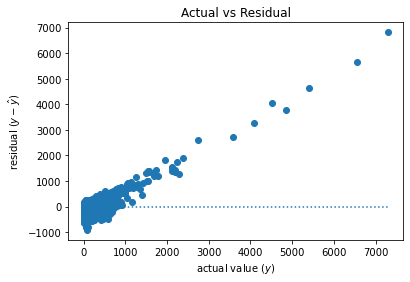

,sse,ess,tss,mse,rmse,r^2
0,277522139.0,6.518006e+07,3.433513e+08,108960.400079,330.091503,0.189835


In [28]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']], y_train.length_of_run)

# predict train
y_train['yhat_lm'] = lm.predict(X_train[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']])

# compute residuals
y_train['residual'] = y_train['yhat_lm'] - y_train['length_of_run']
y_train['baseline_residual'] = y_train['yhat_baseline_mean'] - y_train['length_of_run']

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_train.length_of_run, y_train.yhat_lm)

#Retrieve evaluation metrics for Linear Regression Model on in-sample data
pd.DataFrame(evaluate.regression_errors(y_train.length_of_run, y_train.yhat_lm)).T

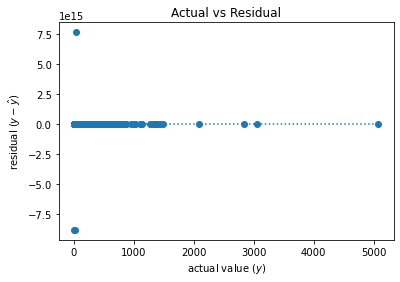

,sse,ess,tss,mse,rmse,r^2
0,2.139651e+32,2.139651e+32,9.001692e+07,1.959387e+29,4.426497e+14,2.376943e+24


In [29]:
X_validate = X[1]

# Calculate Baseline Mean on y_validate
yhat_baseline = y_validate['length_of_run'].mean()
y_validate['yhat_baseline_mean'] = yhat_baseline

# predict validate
y_validate['yhat_lm'] = lm.predict(X_validate[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']])

# compute residuals
y_validate['residual'] = y_validate['yhat_lm'] - y_validate['length_of_run']
y_validate['baseline_residual'] = y_validate['yhat_baseline_mean'] - y_validate['length_of_run']

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_validate.length_of_run, y_validate.yhat_lm)

#Retrieve evaluation metrics for Linear Regression Model on in-sample data
pd.DataFrame(evaluate.regression_errors(y_validate.length_of_run, y_validate.yhat_lm)).T

**Takeaways:**<br>
-The Linear regression model performs better than the baseline model<br>
-But the RMSE is 330 and being off by 330 is almost a full year == LOTS of money in Broadway revenue terms.<br>
-Must see if I can build a model that further reduces rmse

---

### Tweedie Regressor Model

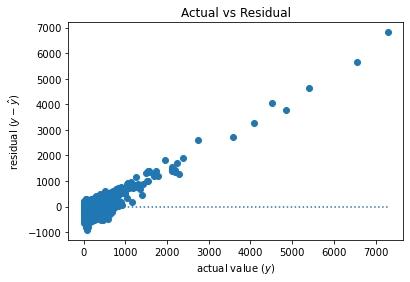

,sse,ess,tss,mse,rmse,r^2
0,2.778172e+08,6.709988e+07,3.433513e+08,109076.248329,330.266935,0.195426


In [30]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']], y_train.length_of_run)

# predict train
y_train['yhat_glm'] = glm.predict(X_train[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']])

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_train.length_of_run, y_train.yhat_glm)

#How does the GLM model perform on in-sample data?
pd.DataFrame(evaluate.regression_errors(y_train.length_of_run, y_train.yhat_glm)).T

**Takeaways**<br>
- GLM model performbs better than baseline with an error of 333 days
- 18 percent of the variance can be explained by this model

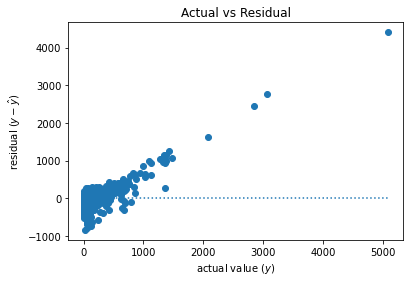

,sse,ess,tss,mse,rmse,r^2
0,7.890212e+07,2.527368e+07,9.001692e+07,72254.68542,268.802317,0.280766


In [31]:
# predict validate
y_validate['yhat_glm'] = glm.predict(X_validate[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']])

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_validate.length_of_run, y_validate.yhat_glm)

#How does the GLM model perform on in-sample data?
pd.DataFrame(evaluate.regression_errors(y_validate.length_of_run, y_validate.yhat_glm)).T

**Takeaways:**

---

### Lassor Lars Modeling

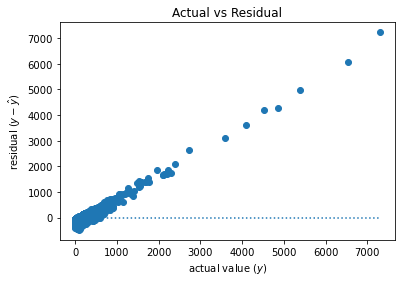

sse     3.006071e+08
ess     1.997655e+07
tss     3.433513e+08
mse     1.180240e+05
rmse    3.435462e+02
r^2     5.818108e-02
dtype: float64

In [32]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']], y_train.length_of_run)

# predict train
y_train['yhat_lars'] = lars.predict(X_train[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']])

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_train.length_of_run, y_train.yhat_lars)

#Retrieve evaluation metrics for Lasso + Lars Model on in-sample data
evaluate.regression_errors(y_train.length_of_run, y_train.yhat_lars)

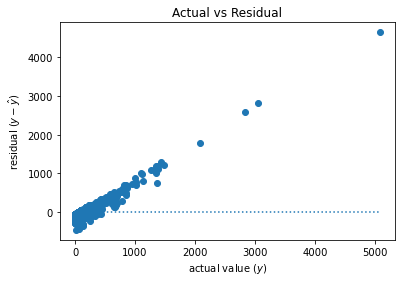

sse     7.912338e+07
ess     7.879250e+06
tss     9.001692e+07
mse     7.245731e+04
rmse    2.691790e+02
r^2     8.753077e-02
dtype: float64

In [33]:
# predict validate
y_validate['yhat_lars'] = lars.predict(X_validate[['is_revival', 'Production Type_Concert',
       'Production Type_Original Production', 'Production Type_Premiere',
       'Production Type_Production', 'Production Type_Revised Production',
       'Production Type_Revival', 'Show Type_Ballet', 'Show Type_Dance',
       'Show Type_Musical', 'Show Type_One-Acts', 'Show Type_Opera Bouffe',
       'Show Type_Operetta', 'Show Type_Other', 'Show Type_Performance',
       'Show Type_Play', 'Show Type_Play with Music', 'Show Type_Solo',
       'Show Type_Vaudeville', 'scaled_Year', 'scaled_N People',
       'scaled_N Performers', 'scaled_N Creative Team', 'scaled_theatre_id',
       'scaled_Theatre Capacity']])

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_validate.length_of_run, y_validate.yhat_lars)

#Retrieve evaluation metrics for Lasso + Lars Model on out-of-sample data
evaluate.regression_errors(y_validate.length_of_run, y_validate.yhat_lars)

**Takeaways:**

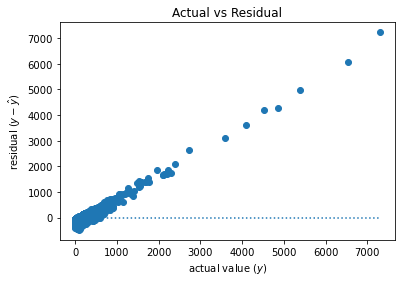

sse     3.006071e+08
ess     1.997655e+07
tss     3.433513e+08
mse     1.180240e+05
rmse    3.435462e+02
r^2     5.818108e-02
dtype: float64

In [34]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train[['Show Type_Musical', 'Show Type_Play', 'scaled_N People', 
                  'scaled_N Performers', 'scaled_N Creative Team']], y_train.length_of_run)

# predict train
y_train['yhat_lars_2'] = lars.predict(X_train[['Show Type_Musical', 'Show Type_Play', 
                                             'scaled_N People', 'scaled_N Performers', 'scaled_N Creative Team']])

#Use evaluate model to visualize the residuals
evaluate.plot_residuals(y_train.length_of_run, y_train.yhat_lars_2)

#Retrieve evaluation metrics for Lasso + Lars Model on in-sample data
evaluate.regression_errors(y_train.length_of_run, y_train.yhat_lars_2)